# Hypothesis Testing in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import pandas
import pandas as pd

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

## Hypothesis Testing in Python

### Hypothesis tests and z-scores
* A/B testing 
	* They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different 	advertising scenarios and see which improved sales the most. 
	* Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.
* Z-Scores	
	* standardized value = (value - mean) / standard deviation

![Screen Shot 2023-02-27 at 3.39.59 PM](Screen%20Shot%202023-02-27%20at%203.39.59%20PM.png)


### Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

In [2]:
late_shipments = shipments.copy()

In [3]:
# Calculate the proportion of late shipmesnts (mean cases where the late column is yes)
late_prop_samp = (late_shipments['late'] == "Yes").mean() # late_shipments['late'] == "Yes" (boolean series) (can call mean on it)
print("Using the boolean series the late shipments proportion of late shipments was : {} or {}%".format(late_prop_samp, 100 * late_prop_samp))

late_prop_samp_vc = late_shipments['late'].value_counts(normalize=True)
print(late_prop_samp_vc, '\n', late_prop_samp_vc['Yes'])

Using the boolean series the late shipments proportion of late shipments was : 0.061 or 6.1%
No     0.939
Yes    0.061
Name: late, dtype: float64 
 0.061


### Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

In [4]:
late_shipments_boot_distn = [0.064, 0.049, 0.06, 0.066, 0.052, 0.066, 0.071, 0.061, 0.051, 0.06, 0.053, 0.066, 0.069, 0.068, 0.063, 0.061, 0.052, 0.045, 0.054, 0.054, 0.064, 0.064, 0.058, 0.062, 0.05, 0.053, 0.064, 0.058, 0.071, 0.064, 0.052, 0.063, 0.056, 0.05, 0.058, 0.06, 0.068, 0.065, 0.056, 0.052, 0.061, 0.059, 0.054, 0.071, 0.067, 0.079, 0.069, 0.069, 0.05, 0.059, 0.062, 0.046, 0.068, 0.057, 0.067, 0.042, 0.074, 0.063, 0.056, 0.063, 0.068, 0.06, 0.068, 0.064, 0.052, 0.045, 0.058, 0.072, 0.078, 0.055, 0.069, 0.048, 0.047, 0.061, 0.066, 0.062, 0.059, 0.062, 0.054, 0.063, 0.061, 0.059, 0.057, 0.059, 0.058, 0.068, 0.067, 0.059, 0.054, 0.064, 0.047, 0.054, 0.065, 0.063, 0.057, 0.062, 0.058, 0.046, 0.052, 0.065, 0.053, 0.069, 0.068, 0.065, 0.052, 0.061, 0.058, 0.042, 0.064, 0.063, 0.068, 0.067, 0.061, 0.056, 0.061, 0.044, 0.058, 0.051, 0.075, 0.064, 0.073, 0.058, 0.056, 0.055, 0.063, 0.056, 0.067, 0.075, 0.061, 0.063, 0.051, 0.065, 0.069, 0.066, 0.05, 0.066, 0.057, 0.064, 0.065, 0.062, 0.071, 0.062, 0.065, 0.062, 0.066, 0.071, 0.058, 0.053, 0.062, 0.051, 0.056, 0.061, 0.074, 0.054, 0.059, 0.069, 0.073, 0.066, 0.052, 0.065, 0.072, 0.071, 0.059, 0.065, 0.06, 0.055, 0.053, 0.059, 0.066, 0.061, 0.053, 0.053, 0.06, 0.058, 0.074, 0.05, 0.059, 0.067, 0.06, 0.064, 0.061, 0.072, 0.06, 0.048, 0.066, 0.059, 0.08, 0.062, 0.066, 0.065, 0.06, 0.048, 0.064, 0.07, 0.053, 0.035, 0.071, 0.061, 0.051, 0.052, 0.051, 0.069, 0.052, 0.052, 0.065, 0.053, 0.055, 0.063, 0.066, 0.062, 0.067, 0.079, 0.062, 0.056, 0.058, 0.068, 0.062, 0.045, 0.063, 0.069, 0.054, 0.065, 0.061, 0.057, 0.05, 0.048, 0.069, 0.058, 0.052, 0.056, 0.057, 0.071, 0.059, 0.062, 0.064, 0.053, 0.065, 0.056, 0.06, 0.062, 0.042, 0.054, 0.051, 0.061, 0.049, 0.071, 0.072, 0.059, 0.063, 0.049, 0.074, 0.063, 0.052, 0.055, 0.072, 0.054, 0.067, 0.067, 0.067, 0.055, 0.073, 0.064, 0.069, 0.06, 0.053, 0.057, 0.056, 0.058, 0.067, 0.065, 0.064, 0.053, 0.055, 0.069, 0.058, 0.07, 0.068, 0.062, 0.062, 0.05, 0.069, 0.061, 0.057, 0.066, 0.056, 0.053, 0.055, 0.062, 0.064, 0.055, 0.056, 0.061, 0.058, 0.068, 0.079, 0.057, 0.049, 0.052, 0.063, 0.064, 0.059, 0.071, 0.064, 0.052, 0.066, 0.063, 0.069, 0.056, 0.057, 0.062, 0.057, 0.055, 0.062, 0.06, 0.064, 0.057, 0.062, 0.069, 0.067, 0.052, 0.061, 0.056, 0.055, 0.056, 0.055, 0.064, 0.068, 0.051, 0.054, 0.057, 0.054, 0.07, 0.049, 0.058, 0.063, 0.07, 0.046, 0.059, 0.064, 0.059, 0.061, 0.066, 0.06, 0.073, 0.08, 0.069, 0.061, 0.071, 0.068, 0.065, 0.063, 0.054, 0.07, 0.061, 0.053, 0.059, 0.047, 0.064, 0.071, 0.068, 0.049, 0.063, 0.057, 0.057, 0.059, 0.061, 0.048, 0.084, 0.07, 0.077, 0.043, 0.065, 0.057, 0.057, 0.054, 0.064, 0.062, 0.067, 0.068, 0.06, 0.054, 0.066, 0.048, 0.048, 0.06, 0.054, 0.067, 0.064, 0.064, 0.067, 0.058, 0.066, 0.06, 0.048, 0.058, 0.054, 0.056, 0.055, 0.068, 0.077, 0.06, 0.061, 0.055, 0.065, 0.064, 0.058, 0.058, 0.058, 0.055, 0.067, 0.061, 0.063, 0.065, 0.071, 0.051, 0.066, 0.066, 0.066, 0.07, 0.068, 0.061, 0.062, 0.054, 0.058, 0.066, 0.059, 0.061, 0.058, 0.057, 0.065, 0.053, 0.053, 0.06, 0.068, 0.067, 0.068, 0.061, 0.067, 0.059, 0.057, 0.055, 0.067, 0.058, 0.055, 0.055, 0.054, 0.061, 0.074, 0.071, 0.057, 0.056, 0.047, 0.07, 0.054, 0.052, 0.072, 0.054, 0.064, 0.063, 0.075, 0.064, 0.051, 0.061, 0.064, 0.047, 0.067, 0.061, 0.06, 0.057, 0.059, 0.058, 0.07, 0.06, 0.056, 0.064, 0.056, 0.066, 0.051, 0.064, 0.054, 0.058, 0.064, 0.041, 0.057, 0.055, 0.06, 0.06, 0.051, 0.054, 0.07, 0.053, 0.063, 0.058, 0.066, 0.059, 0.051, 0.067, 0.078, 0.056, 0.068, 0.057, 0.059, 0.062, 0.053, 0.064, 0.067, 0.068, 0.071, 0.066, 0.057, 0.063, 0.067, 0.059, 0.057, 0.064, 0.049, 0.066, 0.055, 0.071, 0.061, 0.078, 0.062, 0.052, 0.058, 0.066, 0.06, 0.054, 0.058, 0.054, 0.062, 0.072, 0.068, 0.057, 0.059, 0.066, 0.066, 0.065, 0.067, 0.071, 0.064, 0.072, 0.067, 0.064, 0.064, 0.051, 0.061, 0.047, 0.07, 0.073, 0.06, 0.066, 0.058, 0.056, 0.064, 0.059, 0.062, 0.046, 0.07, 0.07, 0.071, 0.056, 0.061, 0.066, 0.058, 0.055, 0.073, 0.068, 0.073, 0.055, 0.074, 0.063, 0.049, 0.063, 0.063, 0.056, 0.061, 0.065, 0.066, 0.06, 0.057, 0.07, 0.06, 0.053, 0.055, 0.066, 0.07, 0.069, 0.051, 0.067, 0.055, 0.06, 0.074, 0.06, 0.057, 0.06, 0.054, 0.054, 0.058, 0.06, 0.057, 0.059, 0.065, 0.061, 0.073, 0.067, 0.063, 0.079, 0.063, 0.063, 0.051, 0.074, 0.06, 0.07, 0.063, 0.072, 0.066, 0.058, 0.046, 0.059, 0.064, 0.058, 0.071, 0.055, 0.062, 0.05, 0.055, 0.061, 0.052, 0.059, 0.063, 0.058, 0.044, 0.052, 0.069, 0.056, 0.057, 0.064, 0.067, 0.058, 0.07, 0.065, 0.068, 0.061, 0.055, 0.06, 0.053, 0.066, 0.052, 0.064, 0.051, 0.076, 0.069, 0.056, 0.057, 0.068, 0.07, 0.065, 0.062, 0.066, 0.063, 0.066, 0.054, 0.061, 0.061, 0.055, 0.053, 0.054, 0.065, 0.073, 0.064, 0.054, 0.065, 0.06, 0.059, 0.056, 0.064, 0.057, 0.06, 0.07, 0.063, 0.064, 0.067, 0.061, 0.053, 0.06, 0.064, 0.064, 0.057, 0.046, 0.057, 0.065, 0.074, 0.062, 0.063, 0.054, 0.074, 0.064, 0.077, 0.068, 0.06, 0.063, 0.059, 0.06, 0.068, 0.052, 0.064, 0.057, 0.059, 0.069, 0.061, 0.064, 0.047, 0.062, 0.069, 0.054, 0.069, 0.063, 0.077, 0.06, 0.061, 0.055, 0.069, 0.061, 0.06, 0.061, 0.067, 0.05, 0.061, 0.062, 0.081, 0.071, 0.057, 0.055, 0.054, 0.07, 0.068, 0.063, 0.056, 0.081, 0.049, 0.07, 0.048, 0.046, 0.069, 0.056, 0.066, 0.058, 0.058, 0.062, 0.052, 0.065, 0.043, 0.062, 0.063, 0.053, 0.073, 0.058, 0.064, 0.071, 0.073, 0.059, 0.08, 0.052, 0.053, 0.053, 0.053, 0.057, 0.061, 0.069, 0.046, 0.063, 0.078, 0.06, 0.06, 0.064, 0.063, 0.065, 0.069, 0.059, 0.068, 0.061, 0.066, 0.064, 0.064, 0.058, 0.046, 0.073, 0.06, 0.056, 0.073, 0.07, 0.058, 0.056, 0.064, 0.069, 0.065, 0.063, 0.063, 0.054, 0.081, 0.044, 0.048, 0.059, 0.058, 0.046, 0.063, 0.072, 0.063, 0.059, 0.063, 0.047, 0.063, 0.065, 0.071, 0.061, 0.05, 0.063, 0.065, 0.054, 0.053, 0.061, 0.054, 0.063, 0.056, 0.071, 0.057, 0.058, 0.049, 0.074, 0.057, 0.058, 0.07, 0.063, 0.057, 0.052, 0.064, 0.074, 0.047, 0.071, 0.051, 0.059, 0.05, 0.059, 0.05, 0.05, 0.057, 0.075, 0.053, 0.07, 0.062, 0.062, 0.075, 0.058, 0.057, 0.05, 0.062, 0.061, 0.067, 0.062, 0.059, 0.059, 0.049, 0.052, 0.062, 0.069, 0.062, 0.054, 0.05, 0.063, 0.052, 0.063, 0.069, 0.057, 0.067, 0.064, 0.057, 0.057, 0.057, 0.05, 0.062, 0.069, 0.075, 0.075, 0.05, 0.06, 0.065, 0.051, 0.063, 0.075, 0.06, 0.058, 0.063, 0.069, 0.055, 0.062, 0.06, 0.057, 0.079, 0.046, 0.059, 0.07, 0.055, 0.08, 0.048, 0.061, 0.042, 0.068, 0.082, 0.044, 0.054, 0.063, 0.054, 0.071, 0.053, 0.061, 0.06, 0.065, 0.072, 0.063, 0.062, 0.053, 0.072, 0.067, 0.058, 0.075, 0.07, 0.052, 0.056, 0.056, 0.082, 0.055, 0.056, 0.057, 0.056, 0.054, 0.073, 0.081, 0.063, 0.063, 0.054, 0.058, 0.062, 0.065, 0.063, 0.062, 0.056, 0.063, 0.06, 0.061, 0.068, 0.067, 0.07, 0.059, 0.06, 0.063, 0.057, 0.052, 0.062, 0.064, 0.065, 0.07, 0.063, 0.062, 0.052, 0.055, 0.055, 0.053, 0.057, 0.058, 0.062, 0.06, 0.056, 0.064, 0.074, 0.071, 0.059, 0.056, 0.063, 0.059, 0.058, 0.054, 0.058, 0.069, 0.06, 0.063, 0.054, 0.047, 0.061, 0.057, 0.059, 0.057, 0.063, 0.06, 0.071, 0.062, 0.06, 0.071, 0.059, 0.049, 0.077, 0.075, 0.071, 0.065, 0.062, 0.065, 0.062, 0.065, 0.077, 0.057, 0.062, 0.053, 0.06, 0.074, 0.065, 0.063, 0.06, 0.071, 0.059, 0.046, 0.065, 0.053, 0.054, 0.063, 0.052, 0.055, 0.059, 0.061, 0.06, 0.068, 0.064, 0.064, 0.056, 0.074, 0.058, 0.062, 0.066, 0.062, 0.066, 0.07, 0.053, 0.064, 0.058, 0.067, 0.059, 0.056, 0.06, 0.06, 0.068, 0.05, 0.07, 0.065, 0.059, 0.056, 0.058, 0.054, 0.07, 0.057, 0.065, 0.068, 0.067, 0.075, 0.05, 0.066, 0.068, 0.07, 0.07, 0.05, 0.062, 0.071, 0.061, 0.059, 0.063, 0.073, 0.067, 0.067, 0.054, 0.054, 0.067, 0.059, 0.049, 0.067, 0.06, 0.076, 0.058, 0.058, 0.06, 0.071, 0.06, 0.065, 0.059, 0.059, 0.072, 0.055, 0.065, 0.061, 0.057, 0.06, 0.067, 0.069, 0.055, 0.049, 0.058, 0.07, 0.054, 0.058, 0.068, 0.062, 0.067, 0.06, 0.055, 0.064, 0.061, 0.052, 0.071, 0.058, 0.069, 0.059, 0.054, 0.056, 0.044, 0.07, 0.053, 0.068, 0.061, 0.075, 0.059, 0.062, 0.063, 0.054, 0.061, 0.064, 0.062, 0.068, 0.072, 0.066, 0.054, 0.061, 0.05, 0.065, 0.064, 0.068, 0.066, 0.06, 0.059, 0.065, 0.057, 0.058, 0.056, 0.069, 0.062, 0.07, 0.06, 0.063, 0.066, 0.067, 0.05, 0.056, 0.069, 0.065, 0.065, 0.061, 0.051, 0.079, 0.046, 0.064, 0.064, 0.052, 0.056, 0.062, 0.054, 0.06, 0.06, 0.051, 0.05, 0.062, 0.055, 0.056, 0.068, 0.059, 0.053, 0.062, 0.07, 0.052, 0.05, 0.066, 0.055, 0.06, 0.062, 0.068, 0.066, 0.056, 0.065, 0.063, 0.049, 0.056, 0.062, 0.056, 0.054, 0.066, 0.055, 0.066, 0.068, 0.063, 0.071, 0.055, 0.062, 0.073, 0.067, 0.062, 0.058, 0.062, 0.045, 0.059, 0.077, 0.054, 0.071, 0.052, 0.058, 0.057, 0.07, 0.063, 0.056, 0.054, 0.057, 0.065, 0.054, 0.062, 0.049, 0.056, 0.071, 0.058, 0.073, 0.06, 0.06, 0.054, 0.062, 0.075, 0.063, 0.063, 0.061, 0.066, 0.058, 0.066, 0.057, 0.07, 0.073, 0.066, 0.058, 0.052, 0.062, 0.063, 0.056, 0.067, 0.069, 0.062, 0.052, 0.055, 0.047, 0.06, 0.049, 0.062, 0.053, 0.064, 0.062, 0.062, 0.071, 0.058, 0.059, 0.051, 0.049, 0.055, 0.051, 0.048, 0.074, 0.055, 0.051, 0.046, 0.055, 0.056, 0.065, 0.066, 0.065, 0.063, 0.064, 0.06, 0.064, 0.043, 0.067, 0.072, 0.043, 0.071, 0.062, 0.061, 0.059, 0.067, 0.07, 0.062, 0.071, 0.045, 0.064, 0.058, 0.067, 0.057, 0.062, 0.063, 0.065, 0.058, 0.048, 0.054, 0.062, 0.058, 0.059, 0.058, 0.048, 0.061, 0.062, 0.062, 0.053, 0.051, 0.056, 0.053, 0.054, 0.063, 0.057, 0.071, 0.052, 0.073, 0.066, 0.059, 0.059, 0.072, 0.072, 0.064, 0.066, 0.068, 0.055, 0.056, 0.058, 0.07, 0.053, 0.058, 0.057, 0.054, 0.058, 0.06, 0.062, 0.068, 0.058, 0.056, 0.069, 0.073, 0.057, 0.06, 0.053, 0.068, 0.053, 0.06, 0.052, 0.068, 0.052, 0.048, 0.064, 0.067, 0.052, 0.054, 0.07, 0.06, 0.063, 0.064, 0.055, 0.066, 0.061, 0.059, 0.061, 0.058, 0.044, 0.06, 0.06, 0.071, 0.06, 0.067, 0.058, 0.062, 0.051, 0.061, 0.061, 0.065, 0.068, 0.052, 0.064, 0.077, 0.057, 0.057, 0.062, 0.054, 0.053, 0.062, 0.066, 0.043, 0.056, 0.056, 0.054, 0.07, 0.056, 0.053, 0.074, 0.052, 0.058, 0.064, 0.069, 0.068, 0.068, 0.045, 0.057, 0.059, 0.066, 0.054, 0.063, 0.046, 0.062, 0.052, 0.067, 0.053, 0.064, 0.056, 0.049, 0.061, 0.065, 0.069, 0.061, 0.058, 0.056, 0.052, 0.062, 0.062, 0.069, 0.063, 0.063, 0.058, 0.053, 0.06, 0.071, 0.063, 0.064, 0.077, 0.065, 0.055, 0.061, 0.048, 0.072, 0.072, 0.07, 0.057, 0.068, 0.058, 0.057, 0.053, 0.059, 0.062, 0.054, 0.056, 0.066, 0.068, 0.063, 0.065, 0.043, 0.062, 0.065, 0.044, 0.053, 0.062, 0.07, 0.068, 0.055, 0.067, 0.063, 0.066, 0.074, 0.06, 0.077, 0.051, 0.057, 0.059, 0.055, 0.063, 0.045, 0.064, 0.058, 0.051, 0.061, 0.06, 0.056, 0.064, 0.072, 0.062, 0.063, 0.051, 0.068, 0.056, 0.059, 0.048, 0.068, 0.062, 0.057, 0.059, 0.059, 0.064, 0.061, 0.073, 0.062, 0.061, 0.058, 0.07, 0.055, 0.063, 0.066, 0.054, 0.051, 0.063, 0.073, 0.071, 0.069, 0.071, 0.056, 0.06, 0.049, 0.072, 0.064, 0.07, 0.054, 0.058, 0.05, 0.064, 0.058, 0.066, 0.067, 0.057, 0.056, 0.057, 0.064, 0.061, 0.056, 0.058, 0.052, 0.049, 0.052, 0.064, 0.058, 0.045, 0.065, 0.071, 0.078, 0.059, 0.064, 0.066, 0.055, 0.064, 0.053, 0.05, 0.072, 0.063, 0.058, 0.057, 0.055, 0.063, 0.066, 0.043, 0.062, 0.068, 0.056, 0.054, 0.065, 0.062, 0.063, 0.061, 0.064, 0.048, 0.073, 0.062, 0.052, 0.05, 0.052, 0.061, 0.045, 0.056, 0.064, 0.053, 0.054, 0.067, 0.068, 0.058, 0.055, 0.072, 0.055, 0.072, 0.072, 0.068, 0.052, 0.066, 0.061, 0.065, 0.06, 0.057, 0.057, 0.055, 0.06, 0.054, 0.057, 0.062, 0.051, 0.066, 0.053, 0.053, 0.054, 0.065, 0.056, 0.062, 0.057, 0.072, 0.071, 0.062, 0.063, 0.063, 0.051, 0.07, 0.072, 0.07, 0.066, 0.064, 0.056, 0.07, 0.058, 0.057, 0.055, 0.055, 0.051, 0.055, 0.066, 0.056, 0.068, 0.06, 0.052, 0.067, 0.062, 0.064, 0.065, 0.055, 0.059, 0.064, 0.053, 0.055, 0.068, 0.045, 0.06, 0.056, 0.066, 0.052, 0.065, 0.057, 0.071, 0.057, 0.065, 0.07, 0.066, 0.066, 0.061, 0.062, 0.056, 0.056, 0.066, 0.075, 0.066, 0.062, 0.052, 0.06, 0.067, 0.064, 0.041, 0.056, 0.054, 0.053, 0.058, 0.054, 0.053, 0.057, 0.062, 0.075, 0.068, 0.052, 0.054, 0.072, 0.062, 0.064, 0.058, 0.067, 0.061, 0.048, 0.078, 0.051, 0.055, 0.055, 0.066, 0.06, 0.054, 0.066, 0.065, 0.051, 0.065, 0.061, 0.054, 0.063, 0.066, 0.056, 0.056, 0.057, 0.062, 0.054, 0.051, 0.067, 0.046, 0.07, 0.056, 0.061, 0.052, 0.054, 0.051, 0.061, 0.059, 0.071, 0.058, 0.062, 0.059, 0.06, 0.064, 0.076, 0.077, 0.079, 0.068, 0.061, 0.056, 0.058, 0.065, 0.057, 0.052, 0.061, 0.045, 0.053, 0.086, 0.067, 0.052, 0.068, 0.058, 0.058, 0.054, 0.055, 0.056, 0.067, 0.05, 0.067, 0.068, 0.063, 0.072, 0.061, 0.068, 0.075, 0.07, 0.064, 0.081, 0.066, 0.057, 0.047, 0.054, 0.059, 0.073, 0.063, 0.046, 0.055, 0.065, 0.052, 0.059, 0.063, 0.06, 0.053, 0.048, 0.05, 0.066, 0.062, 0.052, 0.069, 0.066, 0.074, 0.057, 0.058, 0.055, 0.064, 0.069, 0.073, 0.05, 0.075, 0.057, 0.068, 0.074, 0.055, 0.066, 0.067, 0.057, 0.063, 0.061, 0.074, 0.058, 0.074, 0.071, 0.055, 0.056, 0.062, 0.069, 0.062, 0.065, 0.065, 0.07, 0.063, 0.063, 0.05, 0.065, 0.064, 0.067, 0.058, 0.062, 0.08, 0.051, 0.047, 0.057, 0.06, 0.053, 0.064, 0.068, 0.067, 0.068, 0.079, 0.056, 0.046, 0.066, 0.066, 0.068, 0.055, 0.068, 0.065, 0.053, 0.057, 0.057, 0.054, 0.067, 0.059, 0.05, 0.066, 0.069, 0.072, 0.059, 0.061, 0.052, 0.067, 0.046, 0.086, 0.068, 0.067, 0.062, 0.073, 0.068, 0.065, 0.048, 0.052, 0.054, 0.066, 0.062, 0.055, 0.07, 0.053, 0.074, 0.051, 0.063, 0.07, 0.061, 0.042, 0.048, 0.056, 0.071, 0.055, 0.061, 0.063, 0.054, 0.056, 0.066, 0.058, 0.061, 0.066, 0.064, 0.067, 0.07, 0.061, 0.078, 0.051, 0.071, 0.066, 0.053, 0.056, 0.057, 0.059, 0.059, 0.046, 0.068, 0.067, 0.06, 0.07, 0.062, 0.08, 0.045, 0.072, 0.054, 0.067, 0.06, 0.063, 0.049, 0.053, 0.058, 0.081, 0.064, 0.064, 0.051, 0.062, 0.064, 0.072, 0.067, 0.052, 0.056, 0.056, 0.078, 0.069, 0.068, 0.064, 0.07, 0.063, 0.071, 0.048, 0.048, 0.048, 0.059, 0.053, 0.061, 0.055, 0.057, 0.062, 0.049, 0.065, 0.065, 0.061, 0.05, 0.058, 0.053, 0.075, 0.063, 0.063, 0.06, 0.064, 0.055, 0.065, 0.064, 0.084, 0.066, 0.075, 0.064, 0.062, 0.063, 0.058, 0.052, 0.059, 0.062, 0.074, 0.067, 0.073, 0.064, 0.069, 0.077, 0.064, 0.053, 0.062, 0.05, 0.072, 0.063, 0.056, 0.066, 0.059, 0.074, 0.058, 0.056, 0.068, 0.052, 0.075, 0.061, 0.061, 0.049, 0.055, 0.067, 0.056, 0.06, 0.061, 0.073, 0.058, 0.069, 0.051, 0.063, 0.058, 0.062, 0.053, 0.068, 0.065, 0.07, 0.064, 0.057, 0.062, 0.072, 0.06, 0.068, 0.042, 0.063, 0.063, 0.071, 0.057, 0.059, 0.071, 0.05, 0.063, 0.071, 0.069, 0.055, 0.068, 0.059, 0.07, 0.057, 0.057, 0.06, 0.055, 0.065, 0.05, 0.05, 0.07, 0.064, 0.062, 0.06, 0.051, 0.064, 0.067, 0.064, 0.073, 0.058, 0.06, 0.065, 0.052, 0.062, 0.063, 0.061, 0.046, 0.062, 0.071, 0.058, 0.054, 0.077, 0.05, 0.049, 0.062, 0.062, 0.056, 0.055, 0.068, 0.066, 0.069, 0.052, 0.06, 0.06, 0.051, 0.055, 0.07, 0.069, 0.056, 0.04, 0.061, 0.059, 0.065, 0.065, 0.051, 0.074, 0.058, 0.073, 0.056, 0.068, 0.048, 0.058, 0.064, 0.052, 0.072, 0.064, 0.062, 0.057, 0.067, 0.046, 0.058, 0.066, 0.064, 0.064, 0.056, 0.05, 0.07, 0.051, 0.053, 0.05, 0.062, 0.059, 0.059, 0.066, 0.075, 0.073, 0.062, 0.055, 0.06, 0.064, 0.066, 0.066, 0.071, 0.048, 0.071, 0.052, 0.043, 0.068, 0.064, 0.062, 0.068, 0.054, 0.053, 0.065, 0.055, 0.07, 0.073, 0.055, 0.052, 0.047, 0.045, 0.063, 0.065, 0.051, 0.066, 0.076, 0.066, 0.049, 0.05, 0.056, 0.076, 0.064, 0.07, 0.04, 0.055, 0.056, 0.068, 0.054, 0.068, 0.063, 0.065, 0.07, 0.051, 0.063, 0.056, 0.073, 0.075, 0.066, 0.07, 0.062, 0.056, 0.056, 0.056, 0.063, 0.056, 0.059, 0.063, 0.074, 0.07, 0.055, 0.055, 0.049, 0.072, 0.051, 0.059, 0.071, 0.06, 0.076, 0.051, 0.046, 0.06, 0.061, 0.058, 0.06, 0.065, 0.056, 0.069, 0.058, 0.063, 0.063, 0.061, 0.065, 0.049, 0.062, 0.059, 0.069, 0.062, 0.055, 0.06, 0.057, 0.055, 0.067, 0.062, 0.066, 0.069, 0.053, 0.06, 0.063, 0.049, 0.064, 0.061, 0.057, 0.064, 0.068, 0.056, 0.065, 0.062, 0.082, 0.066, 0.058, 0.056, 0.06, 0.06, 0.049, 0.052, 0.068, 0.061, 0.075, 0.049, 0.06, 0.055, 0.066, 0.05, 0.064, 0.056, 0.069, 0.071, 0.063, 0.069, 0.052, 0.057, 0.068, 0.058, 0.068, 0.066, 0.053, 0.051, 0.059, 0.069, 0.058, 0.058, 0.061, 0.066, 0.059, 0.056, 0.053, 0.071, 0.067, 0.055, 0.066, 0.055, 0.06, 0.042, 0.055, 0.069, 0.076, 0.039, 0.064, 0.065, 0.056, 0.069, 0.05, 0.07, 0.067, 0.065, 0.04, 0.052, 0.068, 0.062, 0.067, 0.06, 0.064, 0.065, 0.06, 0.057, 0.075, 0.065, 0.061, 0.058, 0.065, 0.067, 0.063, 0.063, 0.065, 0.064, 0.062, 0.067, 0.054, 0.057, 0.057, 0.05, 0.038, 0.058, 0.056, 0.06, 0.063, 0.054, 0.076, 0.058, 0.056, 0.074, 0.081, 0.068, 0.059, 0.058, 0.048, 0.075, 0.064, 0.07, 0.069, 0.071, 0.066, 0.061, 0.066, 0.056, 0.066, 0.058, 0.052, 0.056, 0.06, 0.053, 0.054, 0.068, 0.077, 0.067, 0.036, 0.067, 0.057, 0.062, 0.07, 0.054, 0.059, 0.053, 0.072, 0.054, 0.062, 0.071, 0.051, 0.052, 0.068, 0.063, 0.069, 0.069, 0.072, 0.055, 0.074, 0.053, 0.062, 0.066, 0.075, 0.056, 0.059, 0.068, 0.079, 0.058, 0.069, 0.071, 0.055, 0.068, 0.063, 0.064, 0.064, 0.057, 0.062, 0.046, 0.068, 0.065, 0.067, 0.054, 0.065, 0.059, 0.065, 0.054, 0.07, 0.063, 0.068, 0.062, 0.056, 0.07, 0.061, 0.065, 0.054, 0.069, 0.06, 0.057, 0.073, 0.059, 0.054, 0.065, 0.058, 0.056, 0.077, 0.058, 0.056, 0.075, 0.063, 0.073, 0.057, 0.046, 0.057, 0.051, 0.054, 0.06, 0.057, 0.076, 0.07, 0.056, 0.073, 0.058, 0.066, 0.06, 0.064, 0.052, 0.059, 0.06, 0.073, 0.056, 0.055, 0.06, 0.052, 0.054, 0.068, 0.072, 0.074, 0.058, 0.067, 0.051, 0.066, 0.055, 0.054, 0.066, 0.066, 0.06, 0.062, 0.069, 0.066, 0.074, 0.064, 0.066, 0.055, 0.065, 0.063, 0.051, 0.066, 0.055, 0.067, 0.053, 0.056, 0.071, 0.063, 0.076, 0.063, 0.068, 0.045, 0.066, 0.068, 0.063, 0.062, 0.061, 0.063, 0.056, 0.056, 0.049, 0.055, 0.059, 0.055, 0.057, 0.065, 0.072, 0.059, 0.06, 0.059, 0.063, 0.061, 0.067, 0.069, 0.063, 0.069, 0.072, 0.058, 0.062, 0.06, 0.068, 0.056, 0.056, 0.051, 0.054, 0.055, 0.058, 0.058, 0.059, 0.064, 0.054, 0.058, 0.067, 0.063, 0.08, 0.054, 0.06, 0.071, 0.071, 0.06, 0.069, 0.063, 0.053, 0.071, 0.059, 0.056, 0.051, 0.07, 0.052, 0.065, 0.055, 0.075, 0.067, 0.075, 0.075, 0.055, 0.066, 0.05, 0.06, 0.077, 0.063, 0.064, 0.076, 0.062, 0.066, 0.066, 0.073, 0.052, 0.047, 0.054, 0.074, 0.063, 0.062, 0.052, 0.06, 0.069, 0.061, 0.06, 0.067, 0.059, 0.054, 0.061, 0.063, 0.06, 0.069, 0.068, 0.07, 0.055, 0.064, 0.067, 0.058, 0.068, 0.065, 0.057, 0.056, 0.06, 0.052, 0.051, 0.062, 0.071, 0.065, 0.062, 0.047, 0.064, 0.058, 0.042, 0.054, 0.065, 0.06, 0.068, 0.062, 0.064, 0.069, 0.056, 0.053, 0.071, 0.056, 0.069, 0.062, 0.064, 0.069, 0.058, 0.065, 0.064, 0.056, 0.064, 0.051, 0.064, 0.067, 0.077, 0.068, 0.063, 0.055, 0.057, 0.057, 0.069, 0.068, 0.058, 0.06, 0.058, 0.074, 0.057, 0.057, 0.055, 0.084, 0.052, 0.05, 0.071, 0.055, 0.057, 0.065, 0.063, 0.061, 0.061, 0.06, 0.048, 0.049, 0.078, 0.065, 0.051, 0.043, 0.064, 0.054, 0.05, 0.077, 0.056, 0.065, 0.061, 0.053, 0.066, 0.061, 0.056, 0.054, 0.055, 0.065, 0.063, 0.051, 0.063, 0.053, 0.071, 0.056, 0.082, 0.065, 0.071, 0.07, 0.055, 0.051, 0.065, 0.058, 0.051, 0.063, 0.052, 0.051, 0.056, 0.056, 0.043, 0.063, 0.058, 0.05, 0.057, 0.056, 0.07, 0.066, 0.06, 0.064, 0.047, 0.07, 0.051, 0.053, 0.059, 0.064, 0.056, 0.052, 0.066, 0.052, 0.06, 0.059, 0.068, 0.072, 0.056, 0.075, 0.063, 0.056, 0.061, 0.064, 0.061, 0.048, 0.062, 0.064, 0.065, 0.059, 0.054, 0.06, 0.052, 0.076, 0.067, 0.057, 0.062, 0.071, 0.057, 0.066, 0.066, 0.055, 0.077, 0.08, 0.065, 0.052, 0.061, 0.073, 0.051, 0.062, 0.066, 0.064, 0.061, 0.071, 0.069, 0.055, 0.061, 0.069, 0.065, 0.043, 0.06, 0.046, 0.064, 0.067, 0.049, 0.064, 0.08, 0.051, 0.059, 0.064, 0.061, 0.055, 0.061, 0.047, 0.053, 0.06, 0.056, 0.051, 0.054, 0.044, 0.056, 0.068, 0.057, 0.057, 0.065, 0.055, 0.057, 0.041, 0.063, 0.068, 0.07, 0.077, 0.064, 0.064, 0.056, 0.063, 0.051, 0.074, 0.051, 0.061, 0.07, 0.07, 0.053, 0.078, 0.063, 0.066, 0.055, 0.075, 0.064, 0.055, 0.067, 0.051, 0.065, 0.061, 0.069, 0.063, 0.075, 0.068, 0.078, 0.083, 0.066, 0.053, 0.06, 0.078, 0.057, 0.065, 0.073, 0.064, 0.058, 0.048, 0.053, 0.062, 0.06, 0.056, 0.06, 0.056, 0.071, 0.062, 0.063, 0.062, 0.082, 0.069, 0.053, 0.051, 0.06, 0.061, 0.057, 0.065, 0.062, 0.059, 0.055, 0.062, 0.057, 0.054, 0.06, 0.057, 0.062, 0.058, 0.059, 0.047, 0.061, 0.059, 0.065, 0.05, 0.054, 0.042, 0.055, 0.063, 0.054, 0.072, 0.065, 0.074, 0.063, 0.069, 0.062, 0.057, 0.079, 0.065, 0.058, 0.055, 0.064, 0.071, 0.073, 0.064, 0.073, 0.053, 0.059, 0.065, 0.058, 0.058, 0.054, 0.049, 0.062, 0.059, 0.068, 0.057, 0.066, 0.072, 0.058, 0.06, 0.057, 0.06, 0.062, 0.057, 0.056, 0.058, 0.068, 0.068, 0.05, 0.046, 0.068, 0.066, 0.055, 0.062, 0.072, 0.048, 0.052, 0.062, 0.061, 0.059, 0.056, 0.065, 0.067, 0.056, 0.067, 0.071, 0.06, 0.064, 0.059, 0.064, 0.05, 0.046, 0.059, 0.077, 0.061, 0.064, 0.05, 0.054, 0.065, 0.064, 0.068, 0.053, 0.07, 0.064, 0.063, 0.07, 0.057, 0.055, 0.048, 0.063, 0.063, 0.055, 0.061, 0.072, 0.059, 0.065, 0.058, 0.043, 0.051, 0.069, 0.063, 0.048, 0.056, 0.063, 0.06, 0.061, 0.074, 0.064, 0.063, 0.065, 0.07, 0.055, 0.059, 0.07, 0.055, 0.06, 0.074, 0.049, 0.054, 0.061, 0.05, 0.06, 0.064, 0.067, 0.068, 0.062, 0.054, 0.052, 0.05, 0.057, 0.059, 0.061, 0.074, 0.065, 0.058, 0.065, 0.067, 0.056, 0.051, 0.062, 0.066, 0.057, 0.068, 0.068, 0.059, 0.057, 0.064, 0.058, 0.048, 0.056, 0.074, 0.065, 0.069, 0.051, 0.059, 0.064, 0.064, 0.056, 0.057, 0.068, 0.055, 0.054, 0.049, 0.051, 0.054, 0.056, 0.068, 0.065, 0.052, 0.057, 0.063, 0.067, 0.065, 0.066, 0.058, 0.068, 0.075, 0.06, 0.073, 0.066, 0.067, 0.051, 0.062, 0.064, 0.073, 0.067, 0.052, 0.062, 0.06, 0.068, 0.06, 0.055, 0.061, 0.065, 0.061, 0.054, 0.059, 0.048, 0.058, 0.051, 0.072, 0.056, 0.052, 0.054, 0.065, 0.06, 0.069, 0.074, 0.06, 0.053, 0.058, 0.069, 0.062, 0.051, 0.061, 0.064, 0.053, 0.057, 0.046, 0.068, 0.069, 0.076, 0.073, 0.041, 0.059, 0.069, 0.06, 0.082, 0.058, 0.069, 0.061, 0.059, 0.058, 0.069, 0.055, 0.076, 0.056, 0.069, 0.064, 0.07, 0.068, 0.069, 0.072, 0.063, 0.063, 0.059, 0.057, 0.069, 0.052, 0.057, 0.061, 0.056, 0.057, 0.054, 0.059, 0.07, 0.057, 0.064, 0.055, 0.064, 0.053, 0.054, 0.064, 0.056, 0.055, 0.073, 0.068, 0.049, 0.065, 0.07, 0.046, 0.065, 0.06, 0.063, 0.06, 0.053, 0.056, 0.061, 0.051, 0.071, 0.055, 0.069, 0.056, 0.06, 0.061, 0.066, 0.063, 0.068, 0.06, 0.066, 0.051, 0.061, 0.057, 0.062, 0.057, 0.066, 0.049, 0.074, 0.062, 0.052, 0.062, 0.052, 0.058, 0.066, 0.065, 0.076, 0.056, 0.055, 0.053, 0.054, 0.07, 0.052, 0.062, 0.066, 0.069, 0.058, 0.052, 0.067, 0.058, 0.067, 0.065, 0.065, 0.051, 0.055, 0.067, 0.053, 0.057, 0.056, 0.068, 0.073, 0.047, 0.055, 0.062, 0.054, 0.058, 0.053, 0.056, 0.053, 0.061, 0.079, 0.057, 0.065, 0.075, 0.046, 0.065, 0.064, 0.062, 0.058, 0.053, 0.06, 0.058, 0.059, 0.061, 0.065, 0.053, 0.065, 0.064, 0.055, 0.054, 0.078, 0.059, 0.056, 0.054, 0.057, 0.06, 0.06, 0.068, 0.067, 0.061, 0.063, 0.056, 0.054, 0.062, 0.059, 0.064, 0.058, 0.047, 0.048, 0.061, 0.053, 0.058, 0.056, 0.058, 0.062, 0.067, 0.047, 0.049, 0.06, 0.047, 0.065, 0.069, 0.076, 0.06, 0.059, 0.057, 0.062, 0.05, 0.054, 0.065, 0.065, 0.067, 0.08, 0.064, 0.065, 0.066, 0.073, 0.063, 0.065, 0.069, 0.07, 0.052, 0.064, 0.062, 0.068, 0.064, 0.056, 0.056, 0.055, 0.071, 0.066, 0.061, 0.052, 0.061, 0.045, 0.062, 0.051, 0.051, 0.073, 0.04, 0.061, 0.057, 0.053, 0.066, 0.06, 0.049, 0.067, 0.071, 0.058, 0.066, 0.067, 0.07, 0.073, 0.061, 0.085, 0.061, 0.067, 0.059, 0.067, 0.068, 0.072, 0.063, 0.049, 0.062, 0.063, 0.059, 0.074, 0.058, 0.052, 0.064, 0.066, 0.056, 0.057, 0.064, 0.062, 0.058, 0.074, 0.05, 0.06, 0.051, 0.059, 0.058, 0.059, 0.062, 0.054, 0.057, 0.06, 0.053, 0.07, 0.06, 0.059, 0.054, 0.06, 0.058, 0.068, 0.067, 0.065, 0.059, 0.066, 0.064, 0.05, 0.063, 0.069, 0.047, 0.066, 0.061, 0.061, 0.047, 0.057, 0.052, 0.063, 0.056, 0.067, 0.068, 0.05, 0.06, 0.063, 0.068, 0.058, 0.051, 0.055, 0.046, 0.07, 0.054, 0.05, 0.063, 0.051, 0.061, 0.062, 0.053, 0.071, 0.058, 0.061, 0.056, 0.066, 0.07, 0.053, 0.065, 0.054, 0.049, 0.063, 0.066, 0.052, 0.056, 0.048, 0.057, 0.057, 0.065, 0.075, 0.053, 0.064, 0.068, 0.061, 0.054, 0.064, 0.058, 0.063, 0.061, 0.056, 0.046, 0.064, 0.055, 0.055, 0.048, 0.061, 0.058, 0.06, 0.052, 0.061, 0.081, 0.061, 0.052, 0.053, 0.054, 0.073, 0.065, 0.055, 0.06, 0.064, 0.055, 0.072, 0.072, 0.066, 0.055, 0.056, 0.065, 0.064, 0.054, 0.066, 0.051, 0.061, 0.061, 0.064, 0.066, 0.055, 0.056, 0.057, 0.077, 0.06, 0.048, 0.061, 0.066, 0.055, 0.059, 0.05, 0.06, 0.042, 0.059, 0.064, 0.055, 0.071, 0.063, 0.067, 0.054, 0.066, 0.052, 0.063, 0.087, 0.045, 0.072, 0.059, 0.072, 0.05, 0.068, 0.06, 0.062, 0.067, 0.05, 0.058, 0.078, 0.06, 0.057, 0.056, 0.067, 0.069, 0.061, 0.071, 0.056, 0.042, 0.067, 0.044, 0.059, 0.064, 0.071, 0.058, 0.056, 0.06, 0.056, 0.056, 0.067, 0.053, 0.048, 0.052, 0.072, 0.07, 0.06, 0.06, 0.056, 0.056, 0.056, 0.046, 0.061, 0.048, 0.063, 0.067, 0.061, 0.062, 0.061, 0.057, 0.059, 0.078, 0.064, 0.067, 0.064, 0.072, 0.053, 0.065, 0.072, 0.051, 0.048, 0.057, 0.059, 0.072, 0.066, 0.054, 0.065, 0.057, 0.055, 0.065, 0.065, 0.066, 0.06, 0.072, 0.059, 0.055, 0.053, 0.068, 0.064, 0.06, 0.061, 0.066, 0.058, 0.07, 0.056, 0.06, 0.055, 0.066, 0.069, 0.062, 0.066, 0.056, 0.045, 0.064, 0.052, 0.049, 0.057, 0.052, 0.049, 0.053, 0.076, 0.056, 0.06, 0.058, 0.073, 0.076, 0.055, 0.055, 0.063, 0.055, 0.061, 0.06, 0.057, 0.065, 0.069, 0.061, 0.073, 0.062, 0.055, 0.071, 0.079, 0.07, 0.05, 0.063, 0.051, 0.056, 0.065, 0.059, 0.062, 0.077, 0.058, 0.061, 0.065, 0.06, 0.074, 0.067, 0.058, 0.055, 0.058, 0.062, 0.056, 0.055, 0.059, 0.07, 0.057, 0.07, 0.064, 0.056, 0.056, 0.051, 0.064, 0.066, 0.058, 0.064, 0.044, 0.063, 0.063, 0.062, 0.059, 0.056, 0.07, 0.052, 0.071, 0.06, 0.059, 0.054, 0.066, 0.056, 0.056, 0.068, 0.06, 0.064, 0.056, 0.065, 0.066, 0.059, 0.055, 0.059, 0.059, 0.053, 0.051, 0.064, 0.059, 0.05, 0.058, 0.059, 0.068, 0.06, 0.058, 0.068, 0.053, 0.063, 0.059, 0.053, 0.076, 0.052, 0.064, 0.056, 0.069, 0.057, 0.073, 0.045, 0.044, 0.07, 0.071, 0.073, 0.076, 0.061, 0.07, 0.069, 0.064, 0.065, 0.06, 0.06, 0.059, 0.053, 0.055, 0.049, 0.067, 0.056, 0.064, 0.042, 0.06, 0.06, 0.062, 0.055, 0.061, 0.061, 0.059, 0.056, 0.077, 0.047, 0.063, 0.082, 0.061, 0.06, 0.057, 0.066, 0.07, 0.046, 0.065, 0.068, 0.069, 0.062, 0.054, 0.052, 0.077, 0.067, 0.072, 0.058, 0.056, 0.076, 0.061, 0.061, 0.062, 0.057, 0.069, 0.067, 0.058, 0.051, 0.059, 0.053, 0.076, 0.061, 0.055, 0.073, 0.062, 0.057, 0.074, 0.06, 0.066, 0.057, 0.068, 0.06, 0.064, 0.054, 0.061, 0.056, 0.056, 0.067, 0.059, 0.063, 0.062, 0.069, 0.065, 0.075, 0.073, 0.069, 0.057, 0.055, 0.057, 0.06, 0.047, 0.065, 0.05, 0.062, 0.056, 0.065, 0.051, 0.067, 0.059, 0.068, 0.07, 0.071, 0.073, 0.068, 0.077, 0.069, 0.056, 0.07, 0.059, 0.061, 0.067, 0.074, 0.058, 0.059, 0.069, 0.049, 0.059, 0.06, 0.055, 0.059, 0.056, 0.058, 0.068, 0.059, 0.067, 0.054, 0.062, 0.052, 0.061, 0.054, 0.052, 0.048, 0.064, 0.061, 0.06, 0.072, 0.052, 0.068, 0.061, 0.064, 0.065, 0.053, 0.051, 0.064, 0.069, 0.057, 0.074, 0.047, 0.066, 0.065, 0.06, 0.092, 0.082, 0.057, 0.06, 0.056, 0.069, 0.07, 0.054, 0.061, 0.053, 0.061, 0.069, 0.057, 0.063, 0.052, 0.076, 0.062, 0.048, 0.06, 0.058, 0.06, 0.065, 0.06, 0.064, 0.058, 0.06, 0.073, 0.058, 0.058, 0.046, 0.064, 0.056, 0.065, 0.046, 0.051, 0.064, 0.051, 0.061, 0.07, 0.058, 0.072, 0.06, 0.068, 0.061, 0.064, 0.059, 0.056, 0.051, 0.061, 0.061, 0.054, 0.073, 0.053, 0.07, 0.071, 0.069, 0.056, 0.06, 0.062, 0.073, 0.055, 0.057, 0.072, 0.056, 0.066, 0.059, 0.067, 0.058, 0.057, 0.065, 0.049, 0.068, 0.061, 0.053, 0.064, 0.061, 0.075, 0.068, 0.066, 0.064, 0.061, 0.056, 0.063, 0.058, 0.076, 0.073, 0.073, 0.06, 0.065, 0.057, 0.057, 0.062, 0.061, 0.062, 0.056, 0.06, 0.052, 0.038, 0.063, 0.064, 0.06, 0.062, 0.06, 0.063, 0.067, 0.071, 0.054, 0.066, 0.059, 0.066, 0.084, 0.062, 0.076, 0.064, 0.059, 0.045, 0.066, 0.077, 0.055, 0.067, 0.059, 0.063, 0.062, 0.062, 0.063, 0.055, 0.06, 0.065, 0.069, 0.069, 0.06, 0.071, 0.06, 0.049, 0.082, 0.069, 0.063, 0.057, 0.061, 0.057, 0.069, 0.061, 0.056, 0.051, 0.065, 0.063, 0.045, 0.064, 0.047, 0.057, 0.054, 0.057, 0.049, 0.053, 0.064, 0.06, 0.063, 0.062, 0.063, 0.061, 0.068, 0.052, 0.052, 0.062, 0.056, 0.06, 0.059, 0.056, 0.061, 0.051, 0.062, 0.059, 0.059, 0.075, 0.075, 0.059, 0.068, 0.056, 0.066, 0.056, 0.06, 0.068, 0.066, 0.059, 0.063, 0.065, 0.061, 0.061, 0.061, 0.054, 0.055, 0.056, 0.053, 0.051, 0.054, 0.071, 0.059, 0.068, 0.076, 0.065, 0.057, 0.068, 0.062, 0.057, 0.059, 0.063, 0.085, 0.072, 0.056, 0.071, 0.06, 0.06, 0.061, 0.066, 0.054, 0.067, 0.068, 0.063, 0.059, 0.055, 0.054, 0.07, 0.064, 0.069, 0.059, 0.05, 0.059, 0.072, 0.069, 0.064, 0.063, 0.055, 0.056, 0.064, 0.063, 0.071, 0.065, 0.065, 0.056, 0.056, 0.065, 0.061, 0.051, 0.05, 0.056, 0.061, 0.057, 0.056, 0.059, 0.062, 0.05, 0.058, 0.069, 0.054, 0.057, 0.068, 0.058, 0.07, 0.043, 0.056, 0.059, 0.065, 0.065, 0.044, 0.067, 0.067, 0.061, 0.07, 0.054, 0.053, 0.067, 0.057, 0.061, 0.057, 0.063, 0.05, 0.069, 0.069, 0.065, 0.074, 0.061, 0.06, 0.056, 0.06, 0.062, 0.075, 0.06, 0.063, 0.06, 0.054, 0.059, 0.057, 0.059, 0.056, 0.064, 0.067, 0.053, 0.065, 0.06, 0.065, 0.068, 0.047, 0.065, 0.064, 0.05, 0.067, 0.064, 0.052, 0.075, 0.069, 0.055, 0.052, 0.069, 0.069, 0.067, 0.057, 0.056, 0.069, 0.058, 0.077, 0.072, 0.068, 0.07, 0.057, 0.067, 0.066, 0.074, 0.068, 0.063, 0.055, 0.056, 0.069, 0.059, 0.062, 0.058, 0.062, 0.059, 0.059, 0.059, 0.059, 0.065, 0.071, 0.067, 0.043, 0.061, 0.06, 0.06, 0.053, 0.069, 0.065, 0.076, 0.059, 0.067, 0.07, 0.055, 0.062, 0.06, 0.058, 0.051, 0.059, 0.057, 0.063, 0.055, 0.072, 0.073, 0.059, 0.053, 0.074, 0.056, 0.061, 0.064, 0.068, 0.057, 0.056, 0.056, 0.061, 0.06, 0.054, 0.076, 0.064, 0.053, 0.058, 0.074, 0.063, 0.068, 0.063, 0.052, 0.066, 0.066, 0.073, 0.067, 0.063, 0.053, 0.062, 0.076, 0.063, 0.057, 0.063, 0.048, 0.065, 0.062, 0.062, 0.053, 0.048, 0.075, 0.059, 0.056, 0.057, 0.055, 0.061, 0.066, 0.056, 0.053, 0.062, 0.075, 0.049, 0.061, 0.052, 0.062, 0.05, 0.062, 0.059, 0.06, 0.064, 0.068, 0.06, 0.052, 0.065, 0.065, 0.052, 0.048, 0.058, 0.072, 0.068, 0.058, 0.063, 0.077, 0.057, 0.063, 0.061, 0.058, 0.049, 0.072, 0.056, 0.062, 0.052, 0.079, 0.054, 0.061, 0.064, 0.059, 0.061, 0.065, 0.057, 0.058, 0.049, 0.062, 0.078, 0.071, 0.062, 0.057, 0.065, 0.067, 0.059, 0.067, 0.066, 0.071, 0.055, 0.073, 0.058, 0.065, 0.053, 0.071, 0.056, 0.056, 0.063, 0.056, 0.058, 0.069, 0.063, 0.054, 0.063, 0.057, 0.07, 0.071, 0.056, 0.058, 0.058, 0.061, 0.065, 0.056, 0.078, 0.05, 0.055, 0.056, 0.059, 0.045, 0.062, 0.052, 0.048, 0.075, 0.065, 0.06, 0.059, 0.066, 0.057, 0.059, 0.072, 0.063, 0.054, 0.06, 0.058, 0.052, 0.06, 0.071, 0.065, 0.059, 0.059, 0.063, 0.053, 0.057, 0.05, 0.06, 0.058, 0.054, 0.058, 0.062, 0.059, 0.056, 0.05, 0.062, 0.045, 0.069, 0.05, 0.06, 0.053, 0.07, 0.062, 0.052, 0.043, 0.067, 0.075, 0.061, 0.051, 0.057, 0.058, 0.075, 0.062, 0.065, 0.049, 0.07, 0.06, 0.06, 0.068, 0.069, 0.068, 0.059, 0.069, 0.048, 0.058, 0.06, 0.06, 0.063, 0.074, 0.056, 0.057, 0.073, 0.058, 0.058, 0.059, 0.054, 0.063, 0.063, 0.05, 0.056, 0.049, 0.049, 0.065, 0.071, 0.06, 0.063, 0.068, 0.057, 0.058, 0.054, 0.051, 0.068, 0.053, 0.058, 0.068, 0.06, 0.064, 0.039, 0.067, 0.064, 0.072, 0.071, 0.047, 0.052, 0.073, 0.054, 0.068, 0.068, 0.055, 0.057, 0.073, 0.061, 0.051, 0.068, 0.071, 0.067, 0.062, 0.06, 0.059, 0.056, 0.067, 0.056, 0.054, 0.07, 0.069, 0.064, 0.057, 0.062, 0.07, 0.065, 0.064, 0.064, 0.063, 0.073, 0.066, 0.059, 0.065, 0.061, 0.048, 0.075, 0.054, 0.054, 0.05, 0.064, 0.053, 0.059, 0.059, 0.076, 0.053, 0.059, 0.059, 0.054, 0.053, 0.052, 0.059, 0.063, 0.053, 0.072, 0.061, 0.051, 0.062, 0.059, 0.066, 0.061, 0.067, 0.063, 0.069, 0.068, 0.074, 0.061, 0.062, 0.067, 0.05, 0.058, 0.057, 0.069, 0.058, 0.056, 0.065, 0.072, 0.067, 0.057, 0.052, 0.058, 0.062, 0.065, 0.066, 0.061, 0.057, 0.057, 0.074, 0.061, 0.064, 0.058, 0.047, 0.068, 0.055, 0.058, 0.05, 0.052, 0.054, 0.055, 0.066, 0.057, 0.072, 0.061, 0.053, 0.06, 0.068, 0.061, 0.051, 0.059, 0.061, 0.07, 0.06, 0.052, 0.055, 0.071, 0.056, 0.08, 0.071, 0.051, 0.061, 0.059, 0.054, 0.05, 0.064, 0.086, 0.066, 0.054, 0.06, 0.052, 0.051, 0.059, 0.063, 0.064, 0.053, 0.058, 0.066, 0.058, 0.057, 0.052, 0.06, 0.067, 0.063, 0.044, 0.064, 0.065, 0.057, 0.061, 0.064, 0.068, 0.057, 0.065, 0.063, 0.06, 0.063, 0.058, 0.07, 0.063, 0.059, 0.065, 0.049, 0.062, 0.053, 0.063, 0.056, 0.072, 0.063, 0.051, 0.077, 0.057, 0.056, 0.052, 0.062, 0.07, 0.061, 0.068, 0.069, 0.063, 0.063, 0.073, 0.054, 0.065, 0.056, 0.066, 0.051, 0.062, 0.073, 0.057, 0.061, 0.052, 0.063, 0.069, 0.06, 0.059, 0.069, 0.076, 0.06, 0.052, 0.073, 0.057, 0.06, 0.052, 0.048, 0.062, 0.074, 0.064, 0.059, 0.059, 0.05, 0.062, 0.061, 0.068, 0.056, 0.053, 0.077, 0.066, 0.057, 0.069, 0.075, 0.065, 0.067, 0.055, 0.074, 0.061, 0.067, 0.061, 0.072, 0.092, 0.074, 0.065, 0.059, 0.061, 0.065, 0.051, 0.066, 0.046, 0.061, 0.058, 0.065, 0.058, 0.064, 0.067, 0.063, 0.05, 0.064, 0.059, 0.073, 0.054, 0.059, 0.074, 0.064, 0.044, 0.057, 0.061, 0.058, 0.057, 0.06, 0.056, 0.06, 0.059, 0.065, 0.067, 0.069, 0.069, 0.061, 0.056, 0.054, 0.057, 0.054, 0.066, 0.056, 0.056, 0.069, 0.062, 0.055, 0.051, 0.051, 0.057, 0.071, 0.067, 0.072, 0.056, 0.048, 0.051, 0.056, 0.045, 0.063, 0.055, 0.06, 0.048, 0.063, 0.069, 0.066, 0.056, 0.062, 0.07, 0.065, 0.066, 0.067, 0.07, 0.05, 0.068, 0.066, 0.056, 0.057, 0.06, 0.061, 0.075, 0.072, 0.041, 0.056, 0.064, 0.053, 0.047, 0.055, 0.059, 0.053, 0.068, 0.044, 0.067, 0.056, 0.064, 0.057, 0.06, 0.059, 0.058, 0.058, 0.062, 0.072, 0.064, 0.074, 0.064, 0.064, 0.072, 0.057, 0.07, 0.048, 0.061, 0.068, 0.063, 0.057, 0.064, 0.066, 0.058, 0.061, 0.052, 0.06, 0.051, 0.057, 0.063, 0.06, 0.062, 0.059, 0.061, 0.068, 0.058, 0.065, 0.067, 0.059, 0.054, 0.049, 0.071, 0.061, 0.068, 0.07, 0.057, 0.06, 0.074, 0.073, 0.058, 0.052, 0.054, 0.068, 0.069, 0.061, 0.076, 0.06, 0.055, 0.06, 0.068, 0.067, 0.064, 0.071, 0.064, 0.06, 0.058, 0.052, 0.058, 0.052, 0.069, 0.049, 0.065, 0.065, 0.065, 0.072, 0.059, 0.059, 0.076, 0.066, 0.065, 0.05, 0.06, 0.069, 0.061, 0.052, 0.07, 0.061, 0.066, 0.053, 0.055, 0.052, 0.059, 0.052, 0.07, 0.06, 0.051, 0.05, 0.065, 0.059, 0.048, 0.044, 0.074, 0.058, 0.055, 0.056, 0.066, 0.047, 0.056, 0.071, 0.053, 0.058, 0.06, 0.058, 0.054, 0.059, 0.055, 0.069, 0.066, 0.051, 0.065, 0.058, 0.067, 0.057, 0.056, 0.065, 0.063, 0.063, 0.047, 0.063, 0.057, 0.059, 0.071, 0.067, 0.055, 0.06, 0.069, 0.058, 0.045, 0.056, 0.054, 0.054, 0.059, 0.059, 0.067, 0.058, 0.062, 0.058, 0.063, 0.06, 0.053, 0.064, 0.056, 0.067, 0.056, 0.065, 0.072, 0.062, 0.043, 0.05, 0.063, 0.067, 0.065, 0.068, 0.064, 0.054, 0.055, 0.066, 0.056, 0.057, 0.06, 0.061, 0.05, 0.051, 0.05, 0.06, 0.052, 0.063, 0.057, 0.072, 0.069, 0.057, 0.047, 0.061, 0.066, 0.057, 0.077, 0.058, 0.056, 0.051, 0.067, 0.067, 0.07, 0.065, 0.066, 0.059, 0.065, 0.064, 0.051, 0.06, 0.067, 0.055, 0.064, 0.06, 0.073, 0.054, 0.052, 0.068, 0.059, 0.061, 0.061, 0.048, 0.059, 0.061, 0.054, 0.061, 0.065, 0.051, 0.059, 0.07, 0.063, 0.054, 0.061, 0.061, 0.056, 0.062, 0.057, 0.079, 0.067, 0.056, 0.045, 0.052, 0.069, 0.067, 0.051, 0.056, 0.063, 0.06, 0.062, 0.061, 0.064, 0.062, 0.067, 0.064, 0.047, 0.068, 0.062, 0.055, 0.068, 0.048, 0.059, 0.052, 0.061, 0.064, 0.061, 0.06, 0.068, 0.053, 0.06, 0.057, 0.055, 0.054, 0.053, 0.068, 0.072, 0.059, 0.057, 0.063, 0.061, 0.074, 0.077, 0.062, 0.055, 0.066, 0.06, 0.058]


In [5]:
import numpy as np
np.mean(late_shipments_boot_distn) # this is the sample statistic from our bootstrap distribution

0.061008400000000004

In [6]:
# Hypothesize that the proportion is 6%
late_prop_hyp = .06

# Sample statistic is 
late_prop_samp = .061

# Calculate the standard error from the standard deviation of the bootstrap distribution
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print(z_score)

0.13353771933071554


* The **z-score** is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

<br>

![Screen Shot 2023-02-27 at 3.59.54 PM](Screen%20Shot%202023-02-27%20at%203.59.54%20PM.png)

### P-Values
* p-values : probability of obtaining a result, assuming the null hypothesis is true
	* Large p-values : stat likely not in the tail of the null distribution (common observed statistic in null hypothesis distribution)
	* Small p-values : stat likely in the tail of the null distribution (uncommon observed statistic in null hypothesis)
	* Quick way to remember is the p-value directly translating to the probability we would see the statistic in our null distribution

![Screen Shot 2023-02-27 at 4.02.24 PM](Screen%20Shot%202023-02-27%20at%204.02.24%20PM.png)
### Calculating P-value
* norm.cdf
	* Left tailed-test : norm.cdf
	* Right tailed test : 1 - norm.cdf()
	* Ex : 1-norm.cdf(z-score, loc=0, scale=1) loc=mean, scale=std

### Calculating p-values - Exercises
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, 
, is that the proportion of late shipments is six percent.

The alternative hypothesis, 
, is that the proportion of late shipments is greater than six percent.

In [7]:
from scipy.stats import norm

late_prop_samp = .061 # observed sample statistic

late_prop_hyp = .06 # hypothesized value 

# bootstrapped standardized error is still std_error from cells above
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value (right tail test)
p_value = 1 - norm.cdf(z_score)
                 
# Print the p-value
print(p_value) 

0.4468840678346485


* The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.

### Statistical significance
* Significance level of a hypothesis test of (alpha) is the threshold point for "beyond a reasonable doubt"
	* Common Values : .2, .1, .05, .01 (.05 most popular)
	* if p < alpha, reject Null Hypothesis; else fail to reject Null
	* Alpha should be set piror to conducting the hypothesis test


### Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. 
* That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

In [8]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, .025)
upper = np.quantile(late_shipments_boot_distn, .975)

# Print the confidence interval
print((lower, upper))

# p-value
print(f"Our p-value above for the hypothesis test was : {p_value}")

(0.047, 0.076)
Our p-value above for the hypothesis test was : 0.4468840678346485


![Screen Shot 2023-02-27 at 4.31.19 PM](Screen%20Shot%202023-02-27%20at%204.31.19%20PM.png)


False Positive Examples - Type I Errors
* Rejecting null hypothesis when in fact it's true
* Finding defendant guilty, when in fact defendant was innoncent
	* Essentially what we declare is not accurated


False Negative - Type 2 Errors
* Finding defendant not guilty when in fact the defendant did commit the crime
* Failing to reject the null hypothesis when in the fact the null hypothesis was false

## Two-Sample and ANOVA Tests
* In this chapter, you’ll learn how to test for differences in means between two groups using t-tests and extend this to more than two groups using ANOVA and pairwise t-tests.

![Screen Shot 2023-02-27 at 4.37.16 PM](Screen%20Shot%202023-02-27%20at%204.37.16%20PM.png)
![Screen Shot 2023-02-27 at 4.39.52 PM](Screen%20Shot%202023-02-27%20at%204.39.52%20PM.png)

### Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called **"t"**, and it can be calculated from three values from each sample using this equation.
* t= (xbar1 - xbar2) / np.sqrt((std_smp1/n_smp1) + (std_sp2/n_smp2))

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

In [9]:
# split late_shipments into a "yes" & "no" group weight kilograms stat of interest
late_shipments_mean_weight_xbar_yes = late_shipments[late_shipments['late'] == 'Yes']['weight_kilograms'].mean()
not_late_shipments_mean_weight_xbar_no = late_shipments[late_shipments['late'] == 'No']['weight_kilograms'].mean()
print(late_shipments_mean_weight_xbar_yes, not_late_shipments_mean_weight_xbar_no)

# Create Sample Standard Deviations
late_weight_sd = np.std(late_shipments[late_shipments['late'] == 'Yes']['weight_kilograms'],ddof=1)
not_late_weight_sd = np.std(late_shipments[late_shipments['late'] == 'No']['weight_kilograms'],ddof=1)
print(late_weight_sd, not_late_weight_sd)

# Total sizes for each group weight counts for t-statistic
n_no = late_shipments.groupby('late')['weight_kilograms'].count()['No']
n_yes = late_shipments.groupby('late')['weight_kilograms'].count()['Yes']

numerator = late_shipments_mean_weight_xbar_yes - not_late_shipments_mean_weight_xbar_no
denominator = np.sqrt(((late_weight_sd ** 2) / n_yes) + ((not_late_weight_sd ** 2) / n_no))

t_stat = numerator/denominator
print(f"Our two sample mean t_stat was {t_stat}")

## Above is how I needed to break up the variables they had declared earlier in the exercise, wanted to do it myself here in the project space (NOte on the denominator not having to be so defined as I had it as normal order of operations will handle)
# # Calculate the numerator of the test statistic
# numerator = xbar_yes - xbar_no

# # Calculate the denominator of the test statistic
# denominator = np.sqrt(s_yes ** 2 / n_yes + s_no ** 2 / n_no)

# # Calculate the test statistic
# t_stat = numerator / denominator

# # Print the test statistic
# print(t_stat)

2715.6721311475408 1897.7912673056444
2544.688210903328 3154.0395070841696
Our two sample mean t_stat was 2.3936661778766433


### Calculating p-values from t-statistics

* t-statistic follows a t-distribution
	* Degrees of Freedom (df)
	* Like Normal Distribution with fatter tails

* Degrees of Freedom
	* Larger degrees of freedom gets closer to normal distribution
	* Normal distribution is a t-distribution w/infinite df (degrees)
	* Degrees of freedom : maximum number of logically independent values in the data sample

* Calculating p-value: one proportion vs a value
	* n Chapter 1, to get the p-value, we transformed the z-score with the normal CDF. 
	* Since it was a right-tailed test, we subtracted the result from one. 
	* In the previous video, we used an approximation for the test statistic standard error using sample information. 
	* Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. 
	* The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation. Here, the multiple estimates correspond to the sample mean and the sample standard deviation.

### Why is t needed?
The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted , and the transformation used the t-distribution. In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?
	* Answer : When a sample standard deviation is used in estimating a standard error.

### From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). 
* In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the Hypotheses
* Null : The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.
* Alternative : The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [10]:
n_no, n_yes, t_stat # Using sizes for two groups in comparsion and t-stat generated from mean difference above
# https://www.statology.org/t-distribution-python/

from scipy.stats import t

# Calculate the degrees of freedom
degrees_of_freedom = (n_no + n_yes) - 2

# Calculate the p-value from the test stat (t stat was negative in exercise - just the order of the numerator above in what was subtracted first) (alternative was for less than)
p_value = t.cdf(-t_stat, degrees_of_freedom)

# Print the p_value
print(p_value, degrees_of_freedom, t_stat)

0.008432382146249523 998 2.3936661778766433


![Screen Shot 2023-02-28 at 11.55.34 AM](Screen%20Shot%202023-02-28%20at%2011.55.34%20AM.png)

### Testing differences between two means using ttest()
* Pingouin Library
	* pingouin.ttest()
	* so the first argument is the `Series of differences`
	* y specifies the hypothesized difference value from the null hypothesis (which is generally zero)
	* Type of alternative is the test type (aka 'two-sided', 'less', 'greater') - tail test


### Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, **sample_dem_data**. Since the counties are the same in both years, **these samples are paired**. The columns containing the samples are dem_percent_12 and dem_percent_16.

     state    county  dem_percent_12  dem_percent_16
0  Alabama   Bullock       76.305900       74.946921
1  Alabama   Chilton       19.453671       15.847352
2  Alabama      Clay       26.673672       18.674517
3  Alabama   Cullman       14.661752       10.028252
4  Alabama  Escambia       36.915731       31.020546
5.040139140132317 5.040139140132317


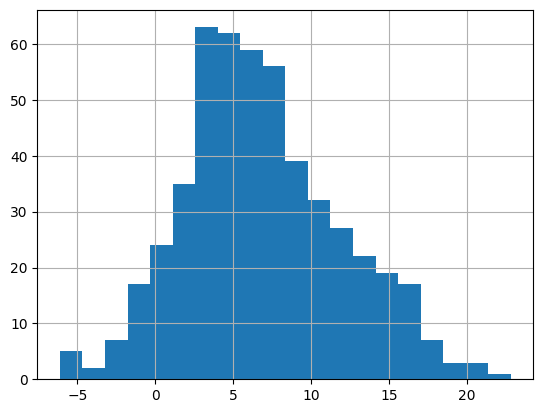

In [11]:
import matplotlib.pyplot as plt

sample_dem_data = democrat_votes.copy()
print(sample_dem_data.head())

# Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff, s_diff_np = sample_dem_data['diff'].std(), np.std(sample_dem_data['diff'], ddof=1) # either way works, pandas defaults to sample not pop dof
print(s_diff, s_diff_np) # standard deviation of differential column

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

### Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the **pingouin Python package has a .ttest() method** to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

* **Null** : The proportion of democratic votes in 2012 and 2016 were the same.
* **Alternative** : The proportion of democratic votes in 2012 and 2016 were different.

In [12]:
import pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

display(test_results)

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, paired=True, alternative='two-sided')
paired_test_results_nondiff = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'],
                                            paired=True, alternative='two-sided')

display(paired_test_results)
display(paired_test_results_nondiff)

print('\n')
# Compare the paired t-test to an (innappropriate unparied test on the same data)
display(pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
               y=sample_dem_data['dem_percent_16'], 
               alternative="two-sided",
               paired=False))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.181565,998,two-sided,1.345737e-12,"[4.96, 8.7]",0.454202,4.308e+09,1.0


* What's the correct decision from the t-test, assuming (alpha = 0.01)
	* P-value is far below that for the paired t_test on the two sets of observations provided to the pingouin method and we'd reject the null in favor of the alternative
	* However, if not pairing the details of the ttest function, the p-value would suggest not to reject the null

<br>

### ANOVA tests
* A test for differecens between groups (generally categories or type columns in pandas dataframes)
* pingouin.anova method 
	* pass the `data`
	* the `dv` or dependent variable you want to see how the different groups varied by (Ex : converted_comp between varying levels of job satisfaction)

![Screen Shot 2023-02-28 at 1.00.09 PM](Screen%20Shot%202023-02-28%20at%201.00.09%20PM.png)
* at least two categories have significantly different compensation based on p value under the alpha significance, however, this doesn't tell us which two categories they are

### Pairwise Tests
To identify which categories are different, we compare all five job satisfaction categories, testing on each pair in turn. There are ten ways of choosing two items from a set of five, so we have ten tests to perform. Our significance level is still point-two.
* To run all the pairwise test in one go, the `pingouin` library has a **pairwise_tests** method which will return a dataframe consisting of all possible combinations from our categories pairwise tests

![Screen Shot 2023-02-28 at 1.02.24 PM](Screen%20Shot%202023-02-28%20at%201.02.24%20PM.png)


### Number of Categorical Groups Consideration
![Screen Shot 2023-02-28 at 1.03.58 PM](Screen%20Shot%202023-02-28%20at%201.03.58%20PM.png)
* In this case we have five groups, resulting in ten pairs. 
	* As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. 
	* The more tests we run, the higher the chance that at least one of them will give a **false positive** significant result. 
	* With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. 
	* With five groups and ten tests, the probability of at least one false positive is around point-seven. 
	* With twenty groups, it's almost guaranteed that we'll get at least one false positive.

### Bonferroni Correction
![Screen Shot 2023-02-28 at 1.06.54 PM](Screen%20Shot%202023-02-28%20at%201.06.54%20PM.png)
* The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive. One common adjustment is the **Bonferroni** correction. Looking at the p-corr column corresponding to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have significant differences.

<br>

#### Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

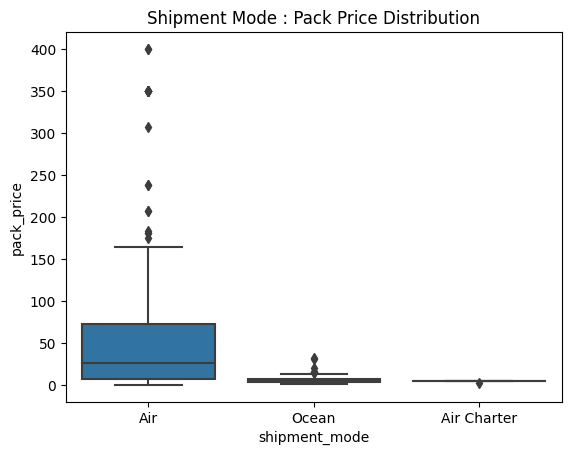

In [13]:
import seaborn as sns

late_shipments.head()

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='shipment_mode', y='pack_price', data=late_shipments)
plt.title('Shipment Mode : Pack Price Distribution')
plt.show()

* There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

In [14]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price', between='shipment_mode')

# Print anova_results
print(anova_results)

# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price', between='shipment_mode', padjust='bonf') 

# Print pairwise_results
display(pairwise_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


* After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

<br>

### One-sample proportion tests
![Screen Shot 2023-02-28 at 1.41.33 PM](Screen%20Shot%202023-02-28%20at%201.41.33%20PM.png)
Chapter 1 recap
The hypothesis tests in Chapter 1 measured whether or not an unknown population proportion was equal to some value. 
* We used bootstrapping on the sample to estimate the standard error of the sample statistic. 
* The standard error was then used to calculate a standardized test statistic, **the z-score**, which was used to get a p-value, so we could decide whether or not to reject the null hypothesis. 
* A bootstrap distribution can be computationally intensive to calculate, so this time we'll instead calculate the test statistic without it.

![Screen Shot 2023-02-28 at 2.24.12 PM](Screen%20Shot%202023-02-28%20at%202.24.12%20PM.png)
* For left-tailed alternative hypotheses, we transform the z-score into a p-value using norm-dot-cdf. 
* For right-tailed alternative hypotheses, we subtract the norm-dot-cdf result from one. 
* For two-tailed alternative hypotheses, we check whether the test statistic lies in either tail, so the p-value is the sum of these two values: one corresponding to the z-score and the other to its negative on the other side of the distribution. 
* Since the normal distribution PDF is symmetric, this simplifies to twice the right-tailed p-value since the z-score is positive. Here, the p-value is less than the significance level of point-zero-one, so we reject the null hypothesis, concluding that the proportion of users under thirty is not equal to point-five.

#### Test for single proportions
In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. 
* An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.
* z = p_hat - null_proportion / np.sqrt(null_proportion * (1 - null_proportion) / n)

In [15]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat_1 = late_shipments['late'].value_counts(normalize=True)['Yes']
p_hat = (late_shipments['late'] == 'Yes').mean()
print(p_hat, p_hat_1)

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

# Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.061 0.061
0.061 1000
0.13315591032282698
0.44703503936503364


### Two-sample proportion tests
![Screen Shot 2023-02-28 at 2.38.11 PM](Screen%20Shot%202023-02-28%20at%202.38.11%20PM.png)
![Screen Shot 2023-02-28 at 2.40.11 PM](Screen%20Shot%202023-02-28%20at%202.40.11%20PM.png)
![Screen Shot 2023-02-28 at 2.43.29 PM](Screen%20Shot%202023-02-28%20at%202.43.29%20PM.png)


![Screen Shot 2023-02-28 at 2.52.59 PM](Screen%20Shot%202023-02-28%20at%202.52.59%20PM.png)


In [16]:
# Calculate the pooled estimate of the population proportion

# Group proportions for each freight_cost_group and their subsequent late proportion (Just looking for yes proportion in each freigh categorical group)
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)
p_hats = p_hats.loc[[('expensive', 'Yes'),('reasonable', 'Yes')]] # multiindex pandas series subset

# Sample Sizes for each freight_cost_groups
ns = late_shipments.groupby('freight_cost_groups')['late'].count()
print(p_hats, ns, '\n')

# Pooled Estimate of the population proportion
pooled_hat = (ns['expensive'] * p_hats['expensive'] + ns['reasonable'] * p_hats['reasonable']) / (ns['expensive'] + ns['reasonable'])

print(pooled_hat, type(pooled_hat), '\n')

# Calculate the standard error of the sample using the pooled_hat value
p_hat_times_not_p_hat = pooled_hat * (1 - pooled_hat)

# Divide by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = (p_hat_times_not_p_hat / ns['expensive']) + (p_hat_times_not_p_hat / ns['reasonable'])

# Calculate the standard errod
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

print(std_error, '\n')

# Calculate the z-score
z_score = (p_hats['expensive'] - p_hats['reasonable']) / std_error 

# Print z_score
print(z_score, '\n')

# Calculate the p-value from the z-score (greater than test)
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

freight_cost_groups  late
expensive            Yes     0.079096
reasonable           Yes     0.035165
Name: late, dtype: float64 freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64 

late
Yes    0.058824
Name: late, dtype: float64 <class 'pandas.core.series.Series'> 

late
Yes    0.015031
Name: late, dtype: float64 

late
Yes    2.922649
Name: late, dtype: float64 

[0.00173534]


* You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.

#### proportions_ztest() for two samples
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

In [17]:
from statsmodels.stats.proportion import proportions_ztest

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

print(late_by_freight_cost_group, '\n')

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([late_by_freight_cost_group[('expensive', 'Yes')], late_by_freight_cost_group[('reasonable', 'Yes')]])

print(success_counts, '\n')

# Create an array of the total number of rows in each freight_cost_group (can sum pandas series by outer index row)
n = np.array([late_by_freight_cost_group['expensive'].sum(), late_by_freight_cost_group['reasonable'].sum()])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative='larger')


# # Print the results
print(stat, p_value)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64 

[42 16] 

2.922648567784529 0.001735340002359578


### Chi-square
* Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups.
* Independence of Variables : More formally, two categorical variables are consider statistically independent when the proportion of successes in the response variable is the same across all categories of the explanatory variable.

Example
![Screen Shot 2023-02-28 at 4.07.07 PM](Screen%20Shot%202023-02-28%20at%204.07.07%20PM.png)
* We can declare hypotheses to test for independence of these variables. 
* Here, age category is the **response variable**, and job satisfaction is the **explanatory variable**. 
* Null : Age categories are independent of job satisfaction levels
* Alternative : Age categories are not independet of job satisfaction levels

* Test Statist denotes (x^2)
* The test statistic is denoted chi-square. 
	* It quantifies how far away the observed results are from the expected values if **independence was true** aka null above.

#### Exploratory Visualization
![Screen Shot 2023-02-28 at 4.10.36 PM](Screen%20Shot%202023-02-28%20at%204.10.36%20PM.png)
* If the age category was independent of job satisfaction, the split between the age categories would be at the same height in each of the five bars. There's some variation here, but we'll need a chi-square independence test to determine whether it's a significant difference.

![Screen Shot 2023-02-28 at 4.12.24 PM](Screen%20Shot%202023-02-28%20at%204.12.24%20PM.png)
* Let's again use the chi-square independence test from pingouin. 
* We have stack_overflow as the data and job_sat and age_cat as x and y. We leave out a correction here since our degrees of freedom is four, calculated by subtracting one from each of the variable categories and multiplying. 
* The p-value is point-two-three, which is above the significance level we set, so we conclude that age categories are independent of job satisfaction.

* If Swapping the variables (aka response for explanatory), the results are identical. Hence we phrase our categorical chi-square test as "are variables X and Y independent"
* We didn't worry about tails in this test, and in fact, the chi2_independence method doesn't have an alternative argument. This is because the chi-square test statistic is based on the square of observed and expected counts, and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.

![Screen Shot 2023-02-28 at 4.17.03 PM](Screen%20Shot%202023-02-28%20at%204.17.03%20PM.png)
![Screen Shot 2023-02-28 at 4.17.11 PM](Screen%20Shot%202023-02-28%20at%204.17.11%20PM.png)
* Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.

### Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:
* EXW: "Ex works". The buyer pays for transportation of the goods.
* CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
* DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
* FCA: "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

* Null Hypothesis : **vender_inco_term** and **freight_cost_group** are independent
* Alternative Hypothesis: **vender_inco_term** and **freight_cost_group** are associated

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: freight_cost_groups, dtype: float64 

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636 



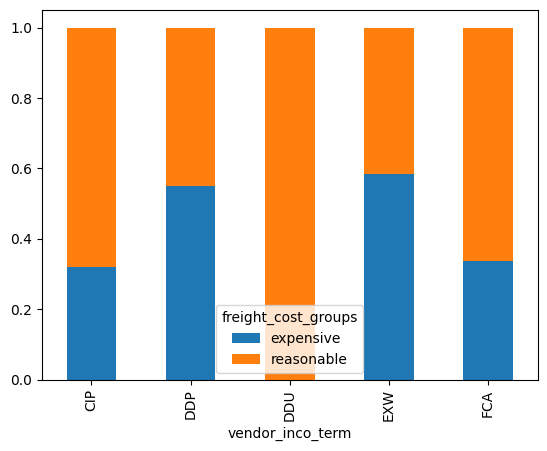



      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [18]:
# Calculate the proportion of freight_cost_group in late_shipments grouped by vendor_inco_term.
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

print(props, '\n')

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props, '\n')

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

print('\n')

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='vendor_inco_term', y='freight_cost_groups')

# Print results (using the stats dataframe from chi2 test return (pulling that dataframe's row details))
print(stats[stats['test'] == 'pearson'])

#### What should you conclude from the hypothesis test? (Chi-Square Above)
* Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.

<br>

### Chi-square goodness of fit tests
Last time, we used a chi-square test to compare proportions in two categorical variables. This time, we'll use another variant of the chi-square test to compare a single categorical variable to a hypothesized distribution.
* The one-sample chi-square test is called a goodness of fit test, as we're testing how well our hypothesized data fits the observed data.

![Screen Shot 2023-02-28 at 4.36.48 PM](Screen%20Shot%202023-02-28%20at%204.36.48%20PM.png)

### Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments. (proportions add to 1)

CIP: 0.05
DDP: 0.1
EXW: 0.75
FCA: 0.1

In [19]:
hypothesized_values = pd.DataFrame({
    'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
    'prop':[.05, .10, .75, .10]
})
hypothesized_values.sort_values('prop', ascending=False, inplace=True)
display(hypothesized_values)
print('\n')
# Exclude marginal DDU vendor_inco_term with only 1 observed count
incoterm_counts = late_shipments['vendor_inco_term'].value_counts(ascending=False)[:4]
display(incoterm_counts) # here is the pandas series to transform then merge below

,vendor_inco_term,prop
2,EXW,0.75
1,DDP,0.10
3,FCA,0.10
0,CIP,0.05


EXW    732
FCA    111
DDP    100
CIP     56
Name: vendor_inco_term, dtype: int64

In [20]:
incoterm_frame = incoterm_counts.rename_axis('vendor_inco_term').reset_index(name='n').sort_values('n', ascending=False)
incoterm_frame

,vendor_inco_term,n
0,EXW,732
1,FCA,111
2,DDP,100
3,CIP,56


In [21]:
combined_frame = hypothesized_values.merge(incoterm_frame, on='vendor_inco_term')
combined_frame['n_estimate'] = combined_frame['prop'] * len(late_shipments) - 1 # we removed the one category count from vendor
display(combined_frame)

,vendor_inco_term,prop,n,n_estimate
0,EXW,0.75,732,749.0
1,DDP,0.10,100,99.0
2,FCA,0.10,111,99.0
3,CIP,0.05,56,49.0


In [22]:
# Above is just a bit of fluff with expermineting on dataframes
# Need to add a number of hypothesized values based off the proportion assigned in the hypothesized times the original dataframe's length (can contrast with that above)

  vendor_inco_term  prop       n
2              EXW  0.75  749.25
1              DDP  0.10   99.90
3              FCA  0.10   99.90
0              CIP  0.05   49.95


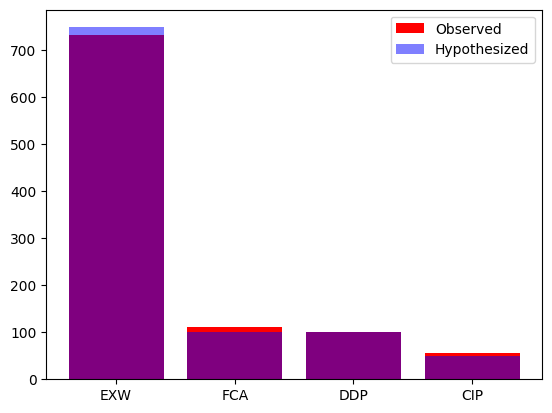

In [23]:
# Find the number of rows in late_shipments
n_total = len(late_shipments) - 1

# Create n column that is prop column * n_total
hypothesized_values['n'] = hypothesized_values['prop'] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized_values)

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_frame['vendor_inco_term'], incoterm_frame['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized_values['vendor_inco_term'], hypothesized_values['n'], color='blue', alpha=0.5, label="Hypothesized")
plt.legend()
plt.show()

* The blue bars are at 50% opacity so any slight deviation in the either larger observed or hypothesized counts for each category can be visualized

### Performing a goodness of fit test
The bar plot of vendor_inco_term suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test
* Null : Sample matches with the hypothesized distribution
* Alternative : Samples does not match with the hypothesized distribution

* Significance (Alpha) - .1

In [24]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
from scipy.stats import chisquare
chisq_one_val, chi_one_val_p = chisquare(f_obs=incoterm_frame['n'], f_exp=hypothesized_values['n'])

print(chisq_one_val,chi_one_val_p)

2.3633633633633613 0.5004909543758689


* What a good goodness of fit! The test to compare the proportions of a categorical variable to a hypothesized distribution is called a chi-square goodness of fit test.
* From the above hypothesis test we would Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.

<br>

### Non-Parametric Tests

#### Assumptions in hypothesis testing
![Screen Shot 2023-03-02 at 10.19.00 AM](Screen%20Shot%202023-03-02%20at%2010.19.00%20AM.png)
![Screen Shot 2023-03-02 at 10.19.24 AM](Screen%20Shot%202023-03-02%20at%2010.19.24%20AM.png)
![Screen Shot 2023-03-02 at 10.19.32 AM](Screen%20Shot%202023-03-02%20at%2010.19.32%20AM.png)

* All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough".

#### Testing sample size
In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: 
* it is a random sample of the population, 
* the observations are independent,  
* there are enough observations. 
 
Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the `late_shipments` dataset.

Note that the **.all()** method from pandas can be used to check if all elements are true. 
* For example, given a DataFrame df with numeric entries, you check to see if all its elements are less than 5, using (df < 5).all().

In [29]:
# Get the count of each value in the freight_cost_group column of late_shipments
late_shipments.head()
counts_fg = late_shipments['freight_cost_groups'].value_counts()
print(counts_fg, type(counts_fg))

print('\n')

# Inspect whether counts are big enough (usually 30 a recognized figure for a "big enough" count for a two sample t-test. )
print((counts_fg > 30).all())

print('\n')
# Count the late values
counts_lv = late_shipments['late'].value_counts()

# Print the result
print(counts_lv)

# Inspect whether the counts are big enough for a one sample proportion test
print((counts_lv >= 10).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64 <class 'pandas.core.series.Series'>


True
No     939
Yes     61
Name: late, dtype: int64
True


In [54]:
# Count the values of freight_cost_group grouped by vendor_inco_term (exclude single cat countfor DDU)
counts_fcg_vnd_in_term = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts_fcg_vnd_in_term, '\n', counts_fcg_vnd_in_term.index, '\n')
print(counts_fcg_vnd_in_term.index.get_level_values(0).tolist(), '\n')

# Exclude the DDU MultiSeriesIndex from our counts to assess for chi-square n threshold 
print(counts_fcg_vnd_in_term[~counts_fcg_vnd_in_term.index.get_level_values(0).isin(['DDU'])])

# Reset categorical counts to not include DDU by using get_level_values on MultiIndex Series
counts_fcg_vnd_in_term = counts_fcg_vnd_in_term[~counts_fcg_vnd_in_term.index.get_level_values(0).isin(['DDU'])]

# Inspect whether the counts are big enough : Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test. (Remember we removed DDU last time for the independence test with these groups)
print((counts_fcg_vnd_in_term >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64 
 MultiIndex([('CIP', 'reasonable'),
            ('CIP',  'expensive'),
            ('DDP',  'expensive'),
            ('DDP', 'reasonable'),
            ('DDU', 'reasonable'),
            ('EXW',  'expensive'),
            ('EXW', 'reasonable'),
            ('FCA', 'reasonable'),
            ('FCA',  'expensive')],
           names=['vendor_inco_term', 'freight_cost_groups']) 

['CIP', 'CIP', 'DDP', 'DDP', 'DDU', 'EXW', 'EXW', 'FCA', 'FCA'] 

vendor_inco_term  freight_cost_groups
CIP               reasonable   

In [56]:
# Get the count of each value in the shipment_mode column of late_shipments.
counts_ship_mode = late_shipments['shipment_mode'].value_counts()
print(counts_ship_mode)
# Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.
print((counts_ship_mode >= 30).all())

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


* While randomness and independence of observations can't easily be tested programmatically, you can test that your sample sizes are big enough to make a hypothesis test appropriate. Based on the last result, we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.

### Parametric Test Assumptions
* The tests that we've seen so far are known as parametric tests. Tests like the z-test, t-test, and ANOVA are all based on the assumption that the population is normally distributed. Parametric tests also require sample sizes that are "big enough" that the Central Limit Theorem applies.

![Screen Shot 2023-03-02 at 11.04.27 AM](Screen%20Shot%202023-03-02%20at%2011.04.27%20AM.png)
![Screen Shot 2023-03-02 at 11.03.29 AM](Screen%20Shot%202023-03-02%20at%2011.03.29%20AM.png)
* Let's study a case where the sample size requirement isn't met with a subset of the US Presidential voting results for Republican candidates that we examined in a previous chapter. 
* Here, **repub_votes_small** contains only five counties randomly sampled from the larger dataset of 2008 and 2012 county-level returns.
* Let's try performing a paired t-test on this small sample. 
	* Recall that we require 30 pairs to feel confident in using a t-test, and this sample only contains five. 
	* We set a significance level of one percent and use the ttest method from pingouin to perform the left-tailed paired t-test.
	* The small p-value indicates we should reject the null hypothesis, leading us to suspect that the 2008 election had a smaller percentage of Republican votes than the 2012 election.

### Non-parametric tests
![Screen Shot 2023-03-02 at 11.08.01 AM](Screen%20Shot%202023-03-02%20at%2011.08.01%20AM.png)
* In situations where we aren't sure about these assumptions, or we are certain that the assumptions aren't met, we can use non-parametric tests. 
* They do not make the normal distribution assumptions or the sample size conditions that we saw in the previous video. 
* There are many different ways to perform tests without these parametric assumptions. 
* In this chapter, we'll focus on those relating to ranks. 
 
* Consider the list, x. x = [1, 15, 3, 10, 6]
	* The first value of x, one, is the smallest value and the second value, fifteen, is the fifth smallest. 
	* These orderings from smallest to largest are known as the ranks of the elements of x. 
	* We can access them with the rankdata method from scipy-dot-stats.
		* from scipy.stats import rankdata
		* rankdata(x)
		* returns = array([1,5,2,4,3]) # smallest to largest 


* Let's now use a non-parametric test to see what kind of results it gives. 
* Remember that non-parametric tests work better than the parametric alternative in situations where the sample size is small or the data cannot be assumed to be normally distributed.
* We will use the Wilcoxon-signed rank test, which was developed by Frank Wilcoxon in 1945 and was one of the first non-parametric procedures developed. 
	* We'll go over the inner workings of the test before implementing it using another pingouin method.

### Wilcon-signed rank test (Steps) : Calculate the absolute differences in the pairs of data and then rank them
![Screen Shot 2023-03-02 at 11.11.33 AM](Screen%20Shot%202023-03-02%20at%2011.11.33%20AM.png)
![Screen Shot 2023-03-02 at 11.11.48 AM](Screen%20Shot%202023-03-02%20at%2011.11.48%20AM.png)
![Screen Shot 2023-03-02 at 11.12.21 AM](Screen%20Shot%202023-03-02%20at%2011.12.21%20AM.png)
![Screen Shot 2023-03-02 at 11.12.40 AM](Screen%20Shot%202023-03-02%20at%2011.12.40%20AM.png)
1. Take the differences in the paired values : df['diff'] = df['col1'] - df['col2']
2. Take the absolute value of the differences .abs() : df['abs_diff'] = df['abs_diff'].abs()
3. Rank absolute differences with rankdata method from scipy.stats : df['abs_rank'] = rankdata(df['abs_diff'])
4. Incorporate tthe sum of the ranks for negative & postivie differnces


### With pingouin - wilcoxon
![Screen Shot 2023-03-02 at 11.17.50 AM](Screen%20Shot%202023-03-02%20at%2011.17.50%20AM.png)


* The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met. (Which parametric test)

### Wilcoxon signed-rank test
You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

In [58]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results_dem_data = pingouin.ttest(sample_dem_data['dem_percent_12'], 
                                              sample_dem_data['dem_percent_16'], 
                                              alternative='two-sided',
                                              paired=True)
print(paired_test_results_dem_data)

# Conduct a Wilcoxon-signed rank test on the same columns.
wilcoxon_test_results = pingouin.wilcoxon(sample_dem_data['dem_percent_12'], 
                                          sample_dem_data['dem_percent_16'],
                                          alternative='two-sided')
print(wilcoxon_test_results)

                T  dof alternative  ...   cohen-d        BF10  power
T-test  30.298384  499   two-sided  ...  0.454202  2.246e+111    1.0

[1 rows x 8 columns]
           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


* You are Wilcox-on the right path! Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.

<br>

### Non-parametric ANOVA and unpaired t-tests
* We'll continue on that theme here focusing on non-parametric alternatives to tests of independent numeric samples.
* We can avoid assumptions about normally distributed data by performing hypothesis tests on the ranks of a numeric input. The `Wilcoxon-Mann-Whitney` test is, very roughly speaking, a t-test on ranked data. 
	* This test is similar to the Wilcoxon test we saw in the last video, but works on **unpaired data** instead.

![Screen Shot 2023-03-02 at 11.26.34 AM](Screen%20Shot%202023-03-02%20at%2011.26.34%20AM.png)
#### Wilcoxon-Mann-Whitney
* Let's set a significance level of one percent. We can run a **Wilcoxon-Mann-Whitney** test using mwu from pingouin. 
	* It accepts x and y arguments corresponding to the two columns of numbers we want to compare, in this case, child and adult. 
	* alternative sets the type of alternative hypothesis, 
		* in this case, that those who code first as children have a higher income than those who code first as adults, which is a right-tailed test. 
		* Here, the p-value is shown as around ten to the negative nineteenth power, which is significantly smaller than the significance level.

![Screen Shot 2023-03-02 at 11.29.16 AM](Screen%20Shot%202023-03-02%20at%2011.29.16%20AM.png)


### Wilcoxon-Mann-Whitney
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

In [64]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

print(weight_vs_late.head(), '\n')

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

print(weight_vs_late_wide.head(), '\n')

# Run a Wilcoxon-Mann-Whitney test for a difference in weight_kilograms when the shipment was late and on-time.
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results (either works in terms of returned p-value)
print(wmw_test, '\n', pingouin.mwu(y=weight_vs_late_wide['No'],
                        x=weight_vs_late_wide['Yes'],
                        alternative='two-sided'))

   weight_kilograms late
0            1426.0  Yes
1              10.0   No
2            3723.0   No
3            7698.0   No
4              56.0   No 

late      No     Yes
0        NaN  1426.0
1       10.0     NaN
2     3723.0     NaN
3     7698.0     NaN
4       56.0     NaN 

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049 
        U-val alternative     p-val       RBC      CLES
MWU  38145.0   two-sided  0.000014 -0.331902  0.665951


* The small p-value here leads us to suspect that a difference **does** exist in the weight of the shipment and whether or not it was late. 
* The `Wilcoxon-Mann-Whitney` test is useful when you **cannot satisfy the assumptions for a parametric test comparing two means**, like the t-test.

### Kruskal-Wallis
* Recall that the **Kruskal-Wallis** test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

In [65]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms', between='shipment_mode')


# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


* The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. 
* The Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.


<br>

![Screen Shot 2023-03-02 at 11.38.46 AM](Screen%20Shot%202023-03-02%20at%2011.38.46%20AM.png)
![Screen Shot 2023-03-02 at 11.39.12 AM](Screen%20Shot%202023-03-02%20at%2011.39.12%20AM.png)
